In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv('dataset.csv')

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_4479/112859877.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [34]:
df.head()

,Subject,Image Data ID,Data Quality Rating,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,3101.0,I353356,1.0,PD,2.248,2.450,1.879,3.346,2.621,2.384,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,3104.0,I301552,1.0,Control,2.220,2.533,1.925,3.430,2.544,2.360,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,3105.0,I226403,1.0,PD,2.056,2.568,1.998,3.056,2.468,2.508,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,3106.0,I491581,1.0,Control,2.267,2.516,1.986,2.288,2.589,2.320,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,3108.0,I232161,1.0,PD,2.532,2.580,2.070,3.111,2.678,2.508,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [35]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [36]:
df = df.dropna()

In [37]:
df.head()

,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,CTinferiortemporalL,CTisthmuscingulateL,CTlateraloccipitalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,PD,2.248,2.450,1.879,3.346,2.621,2.384,2.831,2.096,2.101,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,Control,2.220,2.533,1.925,3.430,2.544,2.360,2.811,2.412,2.265,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,PD,2.056,2.568,1.998,3.056,2.468,2.508,2.743,2.008,2.169,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,Control,2.267,2.516,1.986,2.288,2.589,2.320,2.808,2.093,2.205,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,PD,2.532,2.580,2.070,3.111,2.678,2.508,2.724,2.255,2.358,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [38]:
regions_FD = df.columns[63:125]
regions_FD = {
    'Frontal':['FDsuperiorfrontalL', 'FDsuperiorfrontalR', 'FDcaudalanteriorcingulateL', 'FDcaudalanteriorcingulateR', 
               'FDcaudalmiddlefrontalL', 'FDcaudalmiddlefrontalR', 'FDlateralorbitofrontalL', 'FDlateralorbitofrontalR', 
               'FDmedialorbitofrontalL', 'FDmedialorbitofrontalR', 'FDparacentralL', 'FDparacentralR', 'FDparsopercularisL', 
               'FDparsopercularisR', 'FDparsorbitalisL', 'FDparsorbitalisR', 'FDparstriangularisL', 'FDparstriangularisR',
               'FDprecentralL', 'FDprecentralR', 'FDrostralanteriorcingulateL', 'FDrostralanteriorcingulateR', 
               'FDrostralmiddlefrontalL','FDrostralmiddlefrontalR', 
               ],
    'Parietal':['FDsuperiorparietalL', 'FDsuperiorparietalR', 'FDinferiorparietalL', 'FDinferiorparietalR', 'FDsupramarginalL', 
                'FDsupramarginalR', 'FDpostcentralL', 'FDpostcentralR', 'FDprecuneusL', 'FDprecuneusR'
                ],
    'Occipital':['FDlateraloccipitalR', 'FDlateraloccipitalL', 'FDlingualL', 'FDlingualR', 'FDcuneusR', 'FDcuneusL',
                 'FDpericalcarineL', 'FDpericalcarineR'
                 ],
    'Temporal':['FDsuperiortemporalL', 'FDsuperiortemporalR', 'FDmiddletemporalL', 'FDmiddletemporalR', 
                'FDinferiortemporalL', 'FDinferiortemporalR', 'FDfusiformR', 'FDfusiformL', 
                'FDtransversetemporalL', 'FDtransversetemporalR', 'FDentorhinalL', 'FDentorhinalR', 
                'FDparahippocampalL', 'FDparahippocampalR', 'FDisthmuscingulateL', 'FDisthmuscingulateR',
                'FDposteriorcingulateL', 'FDposteriorcingulateR'
                ],
}

In [39]:
average_fractal_dimensionality = {}
for region, columns in regions_FD.items():
    average_fractal_dimensionality[region] = df[columns].mean(axis=1)

# Print or use average_fractal_dimensionality dictionary as needed
print(average_fractal_dimensionality)

{'Frontal': 0      2.087992
1      2.074671
2      2.080971
3      2.042112
4      2.076675
         ...   
152    2.089612
153    2.076929
154    2.056900
155    2.075163
156    2.078937
Length: 157, dtype: float64, 'Parietal': 0      2.16856
1      2.16591
2      2.17666
3      2.14311
4      2.16694
        ...   
152    2.17656
153    2.16238
154    2.12600
155    2.18018
156    2.16069
Length: 157, dtype: float64, 'Occipital': 0      2.024350
1      2.058725
2      2.039375
3      2.029762
4      2.078775
         ...   
152    2.050575
153    2.077863
154    2.028650
155    2.082888
156    2.033200
Length: 157, dtype: float64, 'Temporal': 0      2.039533
1      2.034678
2      2.014717
3      1.963322
4      2.029956
         ...   
152    2.041800
153    2.046950
154    2.027550
155    2.040739
156    2.031344
Length: 157, dtype: float64}


/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_4479/2535896502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=columns[0], data=df, palette='Set2', inner='quartile')  # Using the first column in the region for visualization
/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_4479/2535896502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=columns[0], data=df, palette='Set2', inner='quartile')  # Using the first column in the region for visualization
/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_4479/2535896502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

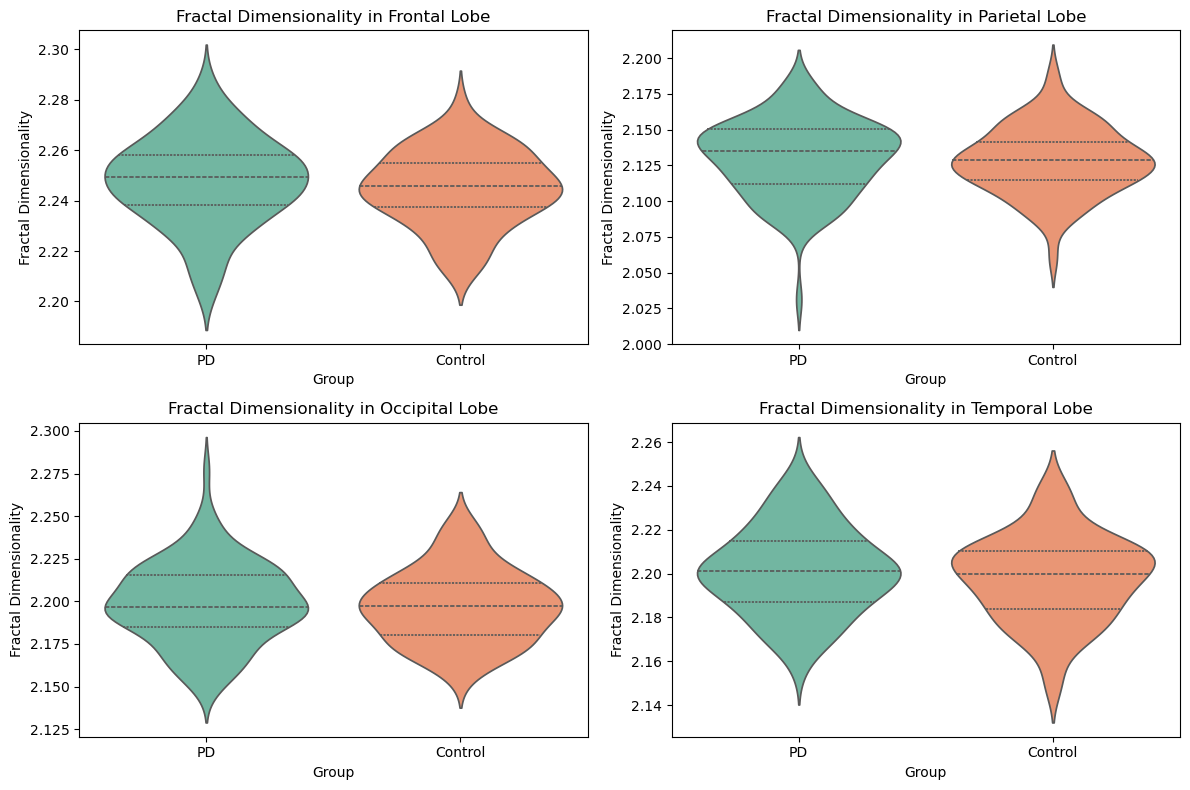

In [40]:
plt.figure(figsize=(12, 8))

# Loop through each brain region and create a violin plot for the 'Group' column
for region, columns in regions_FD.items():
    plt.subplot(2, 2, list(regions_FD.keys()).index(region) + 1)  # Create subplots for each region
    sns.violinplot(x='Group', y=columns[0], data=df, palette='Set2', inner='quartile')  # Using the first column in the region for visualization
    plt.title(f'Fractal Dimensionality in {region} Lobe')
    plt.xlabel('Group')
    plt.ylabel('Fractal Dimensionality')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

features = pd.DataFrame({region: df[columns[0]] for region, columns in regions_FD.items()})
target = LabelEncoder().fit_transform(df['Group'])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(class_weight= 'balanced', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_4479/1648357862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


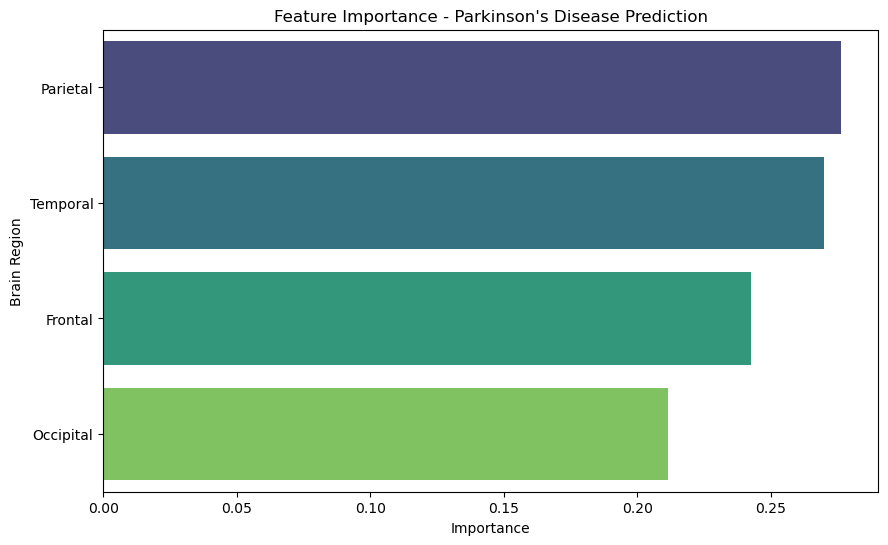

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Parkinson\'s Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Brain Region')
plt.show()